In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time

In [3]:
train_data = pd.read_csv(r'C:\Users\duart\OneDrive\Ambiente_de_Trabalho\Master_Analysis_Engineering_Big_Data\23-24\1st_semester\AA_ML\Kaggle_challenges\3_body_problem\3_body_problem\X_train.csv')

In [4]:
train_data.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [6]:
train_data.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [16]:
idx = np.hstack((0, train_data[train_data.t == 10].index.values +1))
idx.shape, train_data.t.min(), train_data.t.max()

((4054,), 0.0, 10.0)

2566


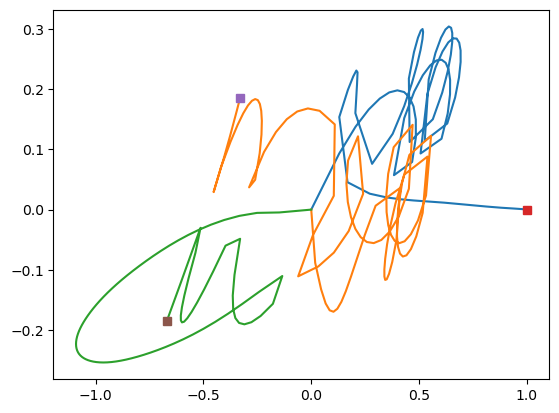

In [18]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k], 257+idx[k])
pltsquare = idx[k]
plt.plot(train_data.x_1[pltidx], train_data.y_1[pltidx])
plt.plot(train_data.x_2[pltidx], train_data.y_2[pltidx])
plt.plot(train_data.x_3[pltidx], train_data.y_3[pltidx])

plt.plot(train_data.x_1[pltsquare], train_data.y_1[pltsquare], 's')
plt.plot(train_data.x_2[pltsquare], train_data.y_2[pltsquare], 's')
plt.plot(train_data.x_3[pltsquare], train_data.y_3[pltsquare], 's')

### Now let's create a copy of our train dataset called X_train

In [21]:
X_train = train_data.copy()
summary_stats = X_train.describe(include="all")
summary_stats

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


#### We can see that there are loads of rows with all 0.0 (corresponding to simulations where there was a collision). 

We are here removing them:

1- Identify faulty rows based on the criterion (all values = 0.0 except for Id)

2- drops the Id row

3- returns a bool op comparing all values to 0.0 (T/F)

4- .all checks if all values in a row are True and returns T/F accordingly 

5- faulty_rows now has all rows from the train set whose values = 0.0

Afterwards, we remove the unwanted rows from the dataset

In [22]:
zero_rows = train_data[(train_data.drop('Id', axis=1) == 0).all(axis=1)]

X_train_processed = train_data[~train_data.index.isin(zero_rows.index)]

In [23]:
summary_stats_filtered = X_train_processed.describe(include='all')

#### Now we do a correlation matrix and plot it as a heatmap (dropping the Id column - index 13)

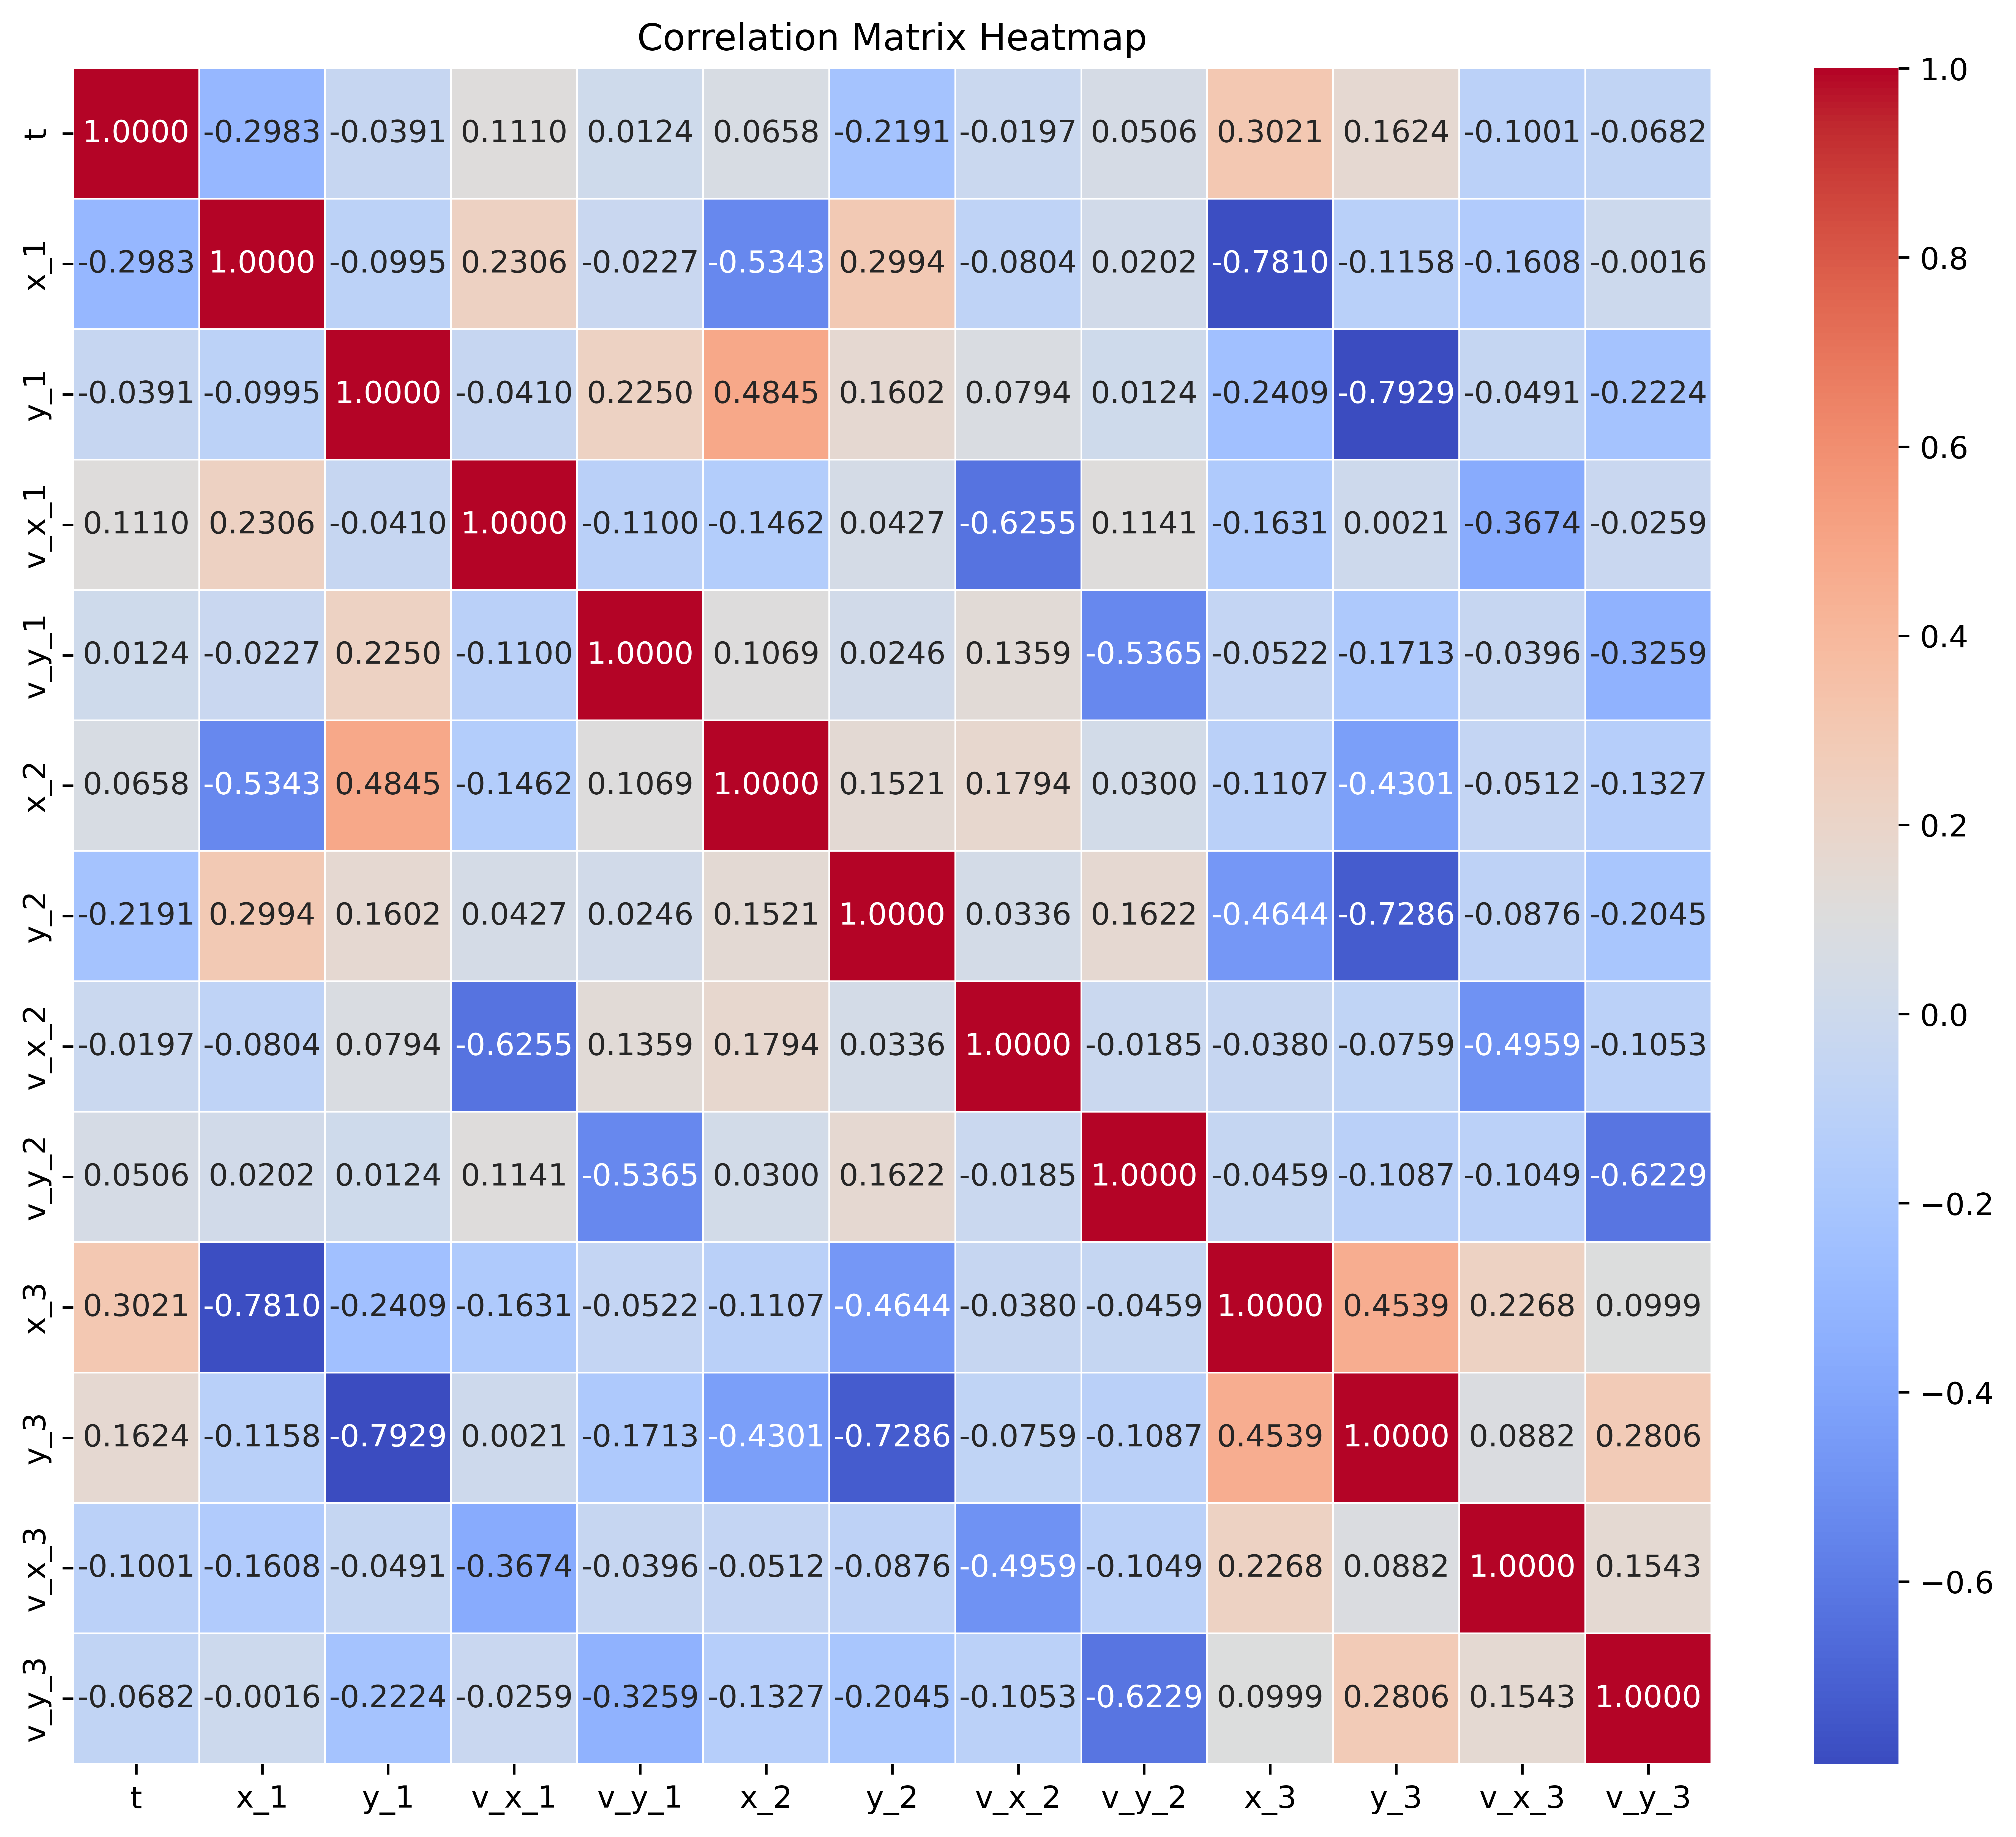

In [24]:
corr_matrix = X_train_processed.drop(X_train_processed.columns[13],
                                       axis=1).corr()

plt.figure(figsize=(12, 10), dpi=800)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f',
            linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Dropping the velocities - this model has the bodies (of equal mass) starting at different positions for each simulation, but the starting velocity is always 0 (in both components, for all bodies)

So, the only thing that really changes from simulation to simulation is just the position of the bodies, nothing else. Strating velocities are constants, masses are constants

In [36]:
#X = []
#y = []

train_no_vel = train_data.drop(columns=['v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'Id'])

In [37]:
train_no_vel.shape

(1285000, 7)

In [38]:
train_no_vel.head((5000))

,t,x_1,y_1,x_2,y_2,x_3,y_3
0,0.000000,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.039062,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.078125,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.117188,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.156250,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022
...,...,...,...,...,...,...,...
4995,4.375000,-4.469816,3.767341,2.173055,-1.794876,2.296761,-1.972465
4996,4.414060,-4.517442,3.808079,2.210859,-1.864645,2.306583,-1.943434
4997,4.453120,-4.565038,3.848792,2.282380,-1.864813,2.282658,-1.983979
4998,4.492190,-4.612605,3.889480,2.275821,-1.841848,2.336784,-2.047632


## CREATING FEATURE MATRICES

In [35]:
# Identify simulation boundaries (t=0)
simulation_boundaries = X_train_processed[X_train_processed['t'] == 0].index

# Initialize lists to store feature matrices and targets for each simulation
feature_matrices = []
targets = []
lag_steps = 1  # Adjust as needed

# Iterate through each simulation
for i in range(len(simulation_boundaries)):
    if i == len(simulation_boundaries) - 1:
        simulation_data = X_train_processed.iloc[simulation_boundaries[i]:]
        # For the last simulation
    else:
        simulation_data = X_train_processed.iloc[simulation_boundaries[i]:
                                                   simulation_boundaries[i+1]]

    # Extract relevant columns for positions and velocities
    positions_and_velocities = simulation_data[['t', 'y_1', 'v_x_1', 'v_y_1',
                                                'x_2', 'y_2', 'v_x_2',
                                                'v_y_2', 'x_3',
                                                'y_3', 'v_x_3',
                                                'v_y_3']].values

    # Generate lagged features for x1
    lagged_x1 = np.roll(positions_and_velocities[:, 1], lag_steps)
    lagged_x1[:lag_steps] = 0  # Replace NaN values introduced by rolling

    # Stack lagged features with original features
    features_with_lagged_x1 = np.column_stack((positions_and_velocities,
                                               lagged_x1))

    # Append the feature matrix for this simulation
    feature_matrices.append(features_with_lagged_x1)

    # Target variable (x1 at each timestamp)
    targets.append(positions_and_velocities[:, 0])
    # Assuming 'x1' is the second column

# Concatenate the feature matrices and targets to create the final feature
# matrix and target array
X = np.vstack(feature_matrices)
y = np.concatenate(targets)

# Convert X to a pandas DataFrame
columns = ['t', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3',
           'y_3', 'v_x_3', 'v_y_3', 'lagged_x1']
X_df = pd.DataFrame(X, columns=columns)

# Convert y to a pandas Series
y_series = pd.Series(y, name='x_1')

# Display the first 5 rows of the pandas DataFrame and Series
print()
print(X.shape, '\n', y.shape)
print("Feature Matrix (X) as a DataFrame:")
print(X_df.head())

print("\nTarget Variable (y) as a Series:")
print(y_series.head())


(1089790, 13) 
 (1089790,)
Feature Matrix (X) as a DataFrame:
          t       y_1     v_x_1     v_y_1       x_2       y_2     v_x_2  \
0  0.000000  0.000000  0.000000  0.000000 -0.266467  0.859196  0.000000   
1  0.039062  0.000092 -0.023159  0.004731 -0.266261  0.858781  0.010574   
2  0.078125  0.000370 -0.046362  0.009474 -0.265641  0.857535  0.021172   
3  0.117188  0.000833 -0.069654  0.014239 -0.264606  0.855456  0.031817   
4  0.156250  0.001483 -0.093080  0.019040 -0.263154  0.852540  0.042533   

      v_y_2       x_3       y_3     v_x_3     v_y_3  lagged_x1  
0  0.000000 -0.733533 -0.859196  0.000000  0.000000   0.000000  
1 -0.021257 -0.733287 -0.858874  0.012584  0.016526   0.000000  
2 -0.042552 -0.732549 -0.857905  0.025189  0.033078   0.000092  
3 -0.063924 -0.731318 -0.856289  0.037837  0.049685   0.000370  
4 -0.085412 -0.729592 -0.854022  0.050548  0.066372   0.000833  

Target Variable (y) as a Series:
0    0.000000
1    0.039062
2    0.078125
3    0.117188
4    0